### Import packages and define directories

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from complexity import complexityBounds
from mpl_settings import *

output_dir = '../output'  ## Directory with H D C files

### Compute theoretical bounds in the H - C plane

In [2]:
N = 120
H_range = np.arange(0.001, 1.0, 0.01)
Cmin_values, Cmax_values = complexityBounds(N, H_range)

/home/nahuel/medyfinol/code/complexity.py:88: RuntimeWarning: invalid value encountered in log2
  rhm = ( x*np.log2(x) + (1-x)*np.log2( (1-x)/(N-n-1) ) ) / np.log2(N)


### Read analyzed series

In [127]:
properties = {}
for file_name in os.listdir(output_dir):
    props = np.loadtxt(output_dir + '/' + file_name)
    version = int(file_name.split('v')[1].split('.')[0])
    properties[version] = props
    
mean_C_values = {}
for version, props in properties.items():
    mean_C = np.mean(props[:,2])
    mean_C_values[version] = mean_C

### Plane H - C plot

For each series of ten agents, plot the corresponding ten pairs of values (H, C). The color of the ten points is givent by the mean of the ten C values.

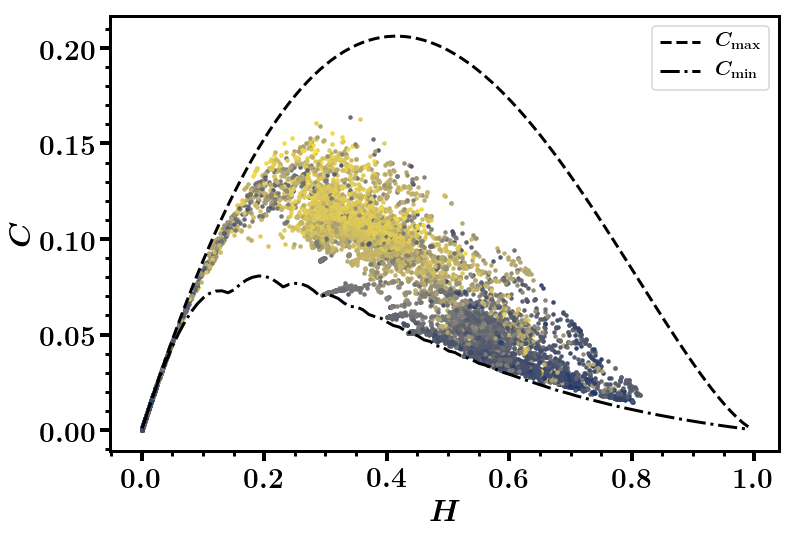

In [128]:
colormap = plt.get_cmap('cividis')

plt.figure(figsize=(12, 8))
plt.plot(H_range, Cmax_values, '--', color='k', label=r'$C_{\mathrm{max}}$')
plt.plot(H_range, Cmin_values, '-.', color='k', label=r'$C_{\mathrm{min}}$')

for version, props in properties.items():
    mean_C = mean_C_values[version]
    norm_mean_C = mean_C / max(mean_C_values.values())
    for (H, D, C) in props:
        color = colormap(norm_mean_C)
        plt.scatter(H, C, marker='.', color=color)

plt.xlabel(r'$H$')
plt.ylabel(r'$C$')
plt.legend(loc='best', fontsize=20)
plt.savefig('../figs/H_vs_C.png')
plt.show()

### Compute histograms of complexity

In [108]:
## Mean over the ten agents
mean_H_values = [] 
mean_D_values = []
mean_C_values = []

## All values
H_values = [] 
D_values = []
C_values = []

## Values only for the first agent
H_values_0 = [] 
D_values_0 = []
C_values_0 = []

for props in properties.values():

    mean_H_values.append(np.mean(props[:,0]))
    mean_D_values.append(np.mean(props[:,1]))
    mean_C_values.append(np.mean(props[:,2]))
    
    H_values_0.append(props[0,0])
    D_values_0.append(props[0,1])
    C_values_0.append(props[0,2])
    
    for (H, D, C) in props:
        H_values.append(H)
        D_values.append(D)
        C_values.append(C)

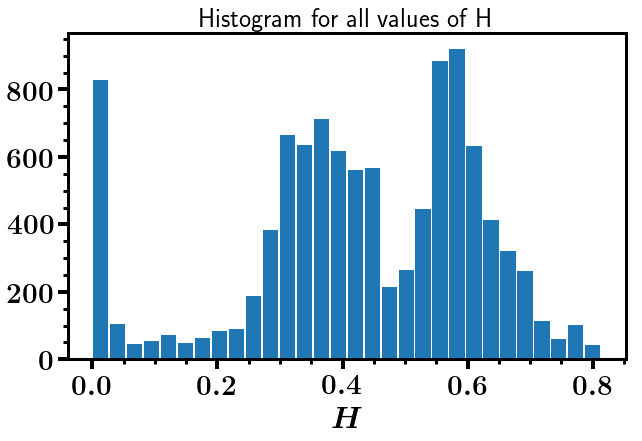

In [123]:
plt.figure(figsize=(10,6))
plt.hist(H_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$H$')
plt.title('Histogram for all values of H', fontsize=26)
plt.show()

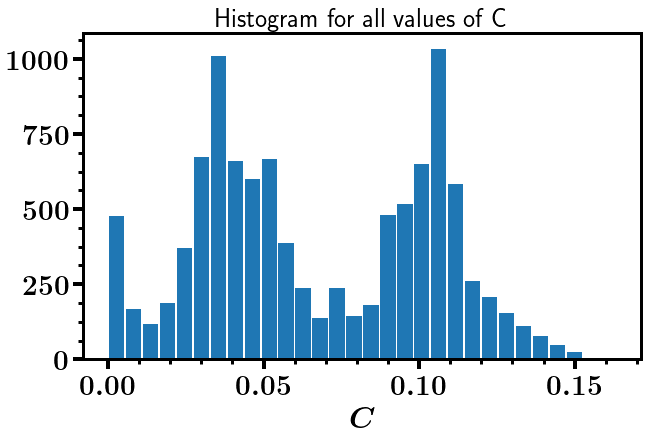

In [124]:
plt.figure(figsize=(10,6))
plt.hist(C_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$C$')
plt.title('Histogram for all values of C', fontsize=26)
plt.show()

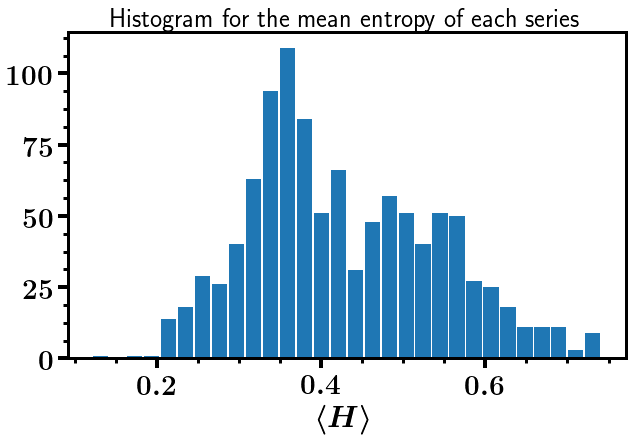

In [125]:
plt.figure(figsize=(10,6))
plt.hist(mean_H_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$\langle H \rangle$')
plt.title('Histogram for the mean entropy of each series', fontsize=26)
plt.show()

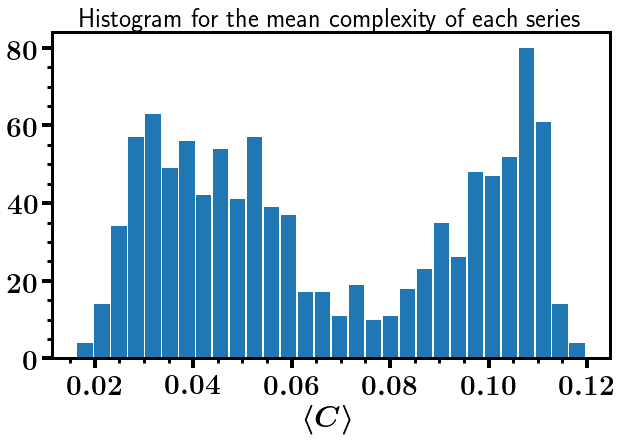

In [126]:
plt.figure(figsize=(10,6))
plt.hist(mean_C_values, bins=30, density=False, rwidth=0.9)
plt.xlabel(r'$\langle C \rangle$')
plt.title('Histogram for the mean complexity of each series', fontsize=26)
plt.show()